# <center> EKE </center> #

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy.ma as ma
import sys
from matplotlib import gridspec
sys.path.append('/noc/users/hb1g13/Python/python_functions/')
from HB_Plot import nf, fmt
import SG
sys.path.append('/noc/users/hb1g13/Python/python_functions/MITgcmUtils/')
import utils
%matplotlib inline

In [20]:
tau = ['50', '250', '500', '1000', '2000', '3000', '10000']
Figletter = ['a) ', 'b) ', 'c) ', 'd) ', 'e)', 'f) ', 'g) ', 'h) ', 'j) ']
# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis/Vary_N/'
# Now Make file structure
check = 0
runs = []
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'m/VSQ.nc'
    if not os.path.exists(flist):
        print ' WARNING: '+flist+' does not exist! (skipping this tau...)'
        check += 0
    else:
        check += 1
        runs.append(i)
Runs = np.array(runs)

In [21]:
fname = x+'/2000m/'
c = utils.ChannelSetup(output_dir=str(fname))

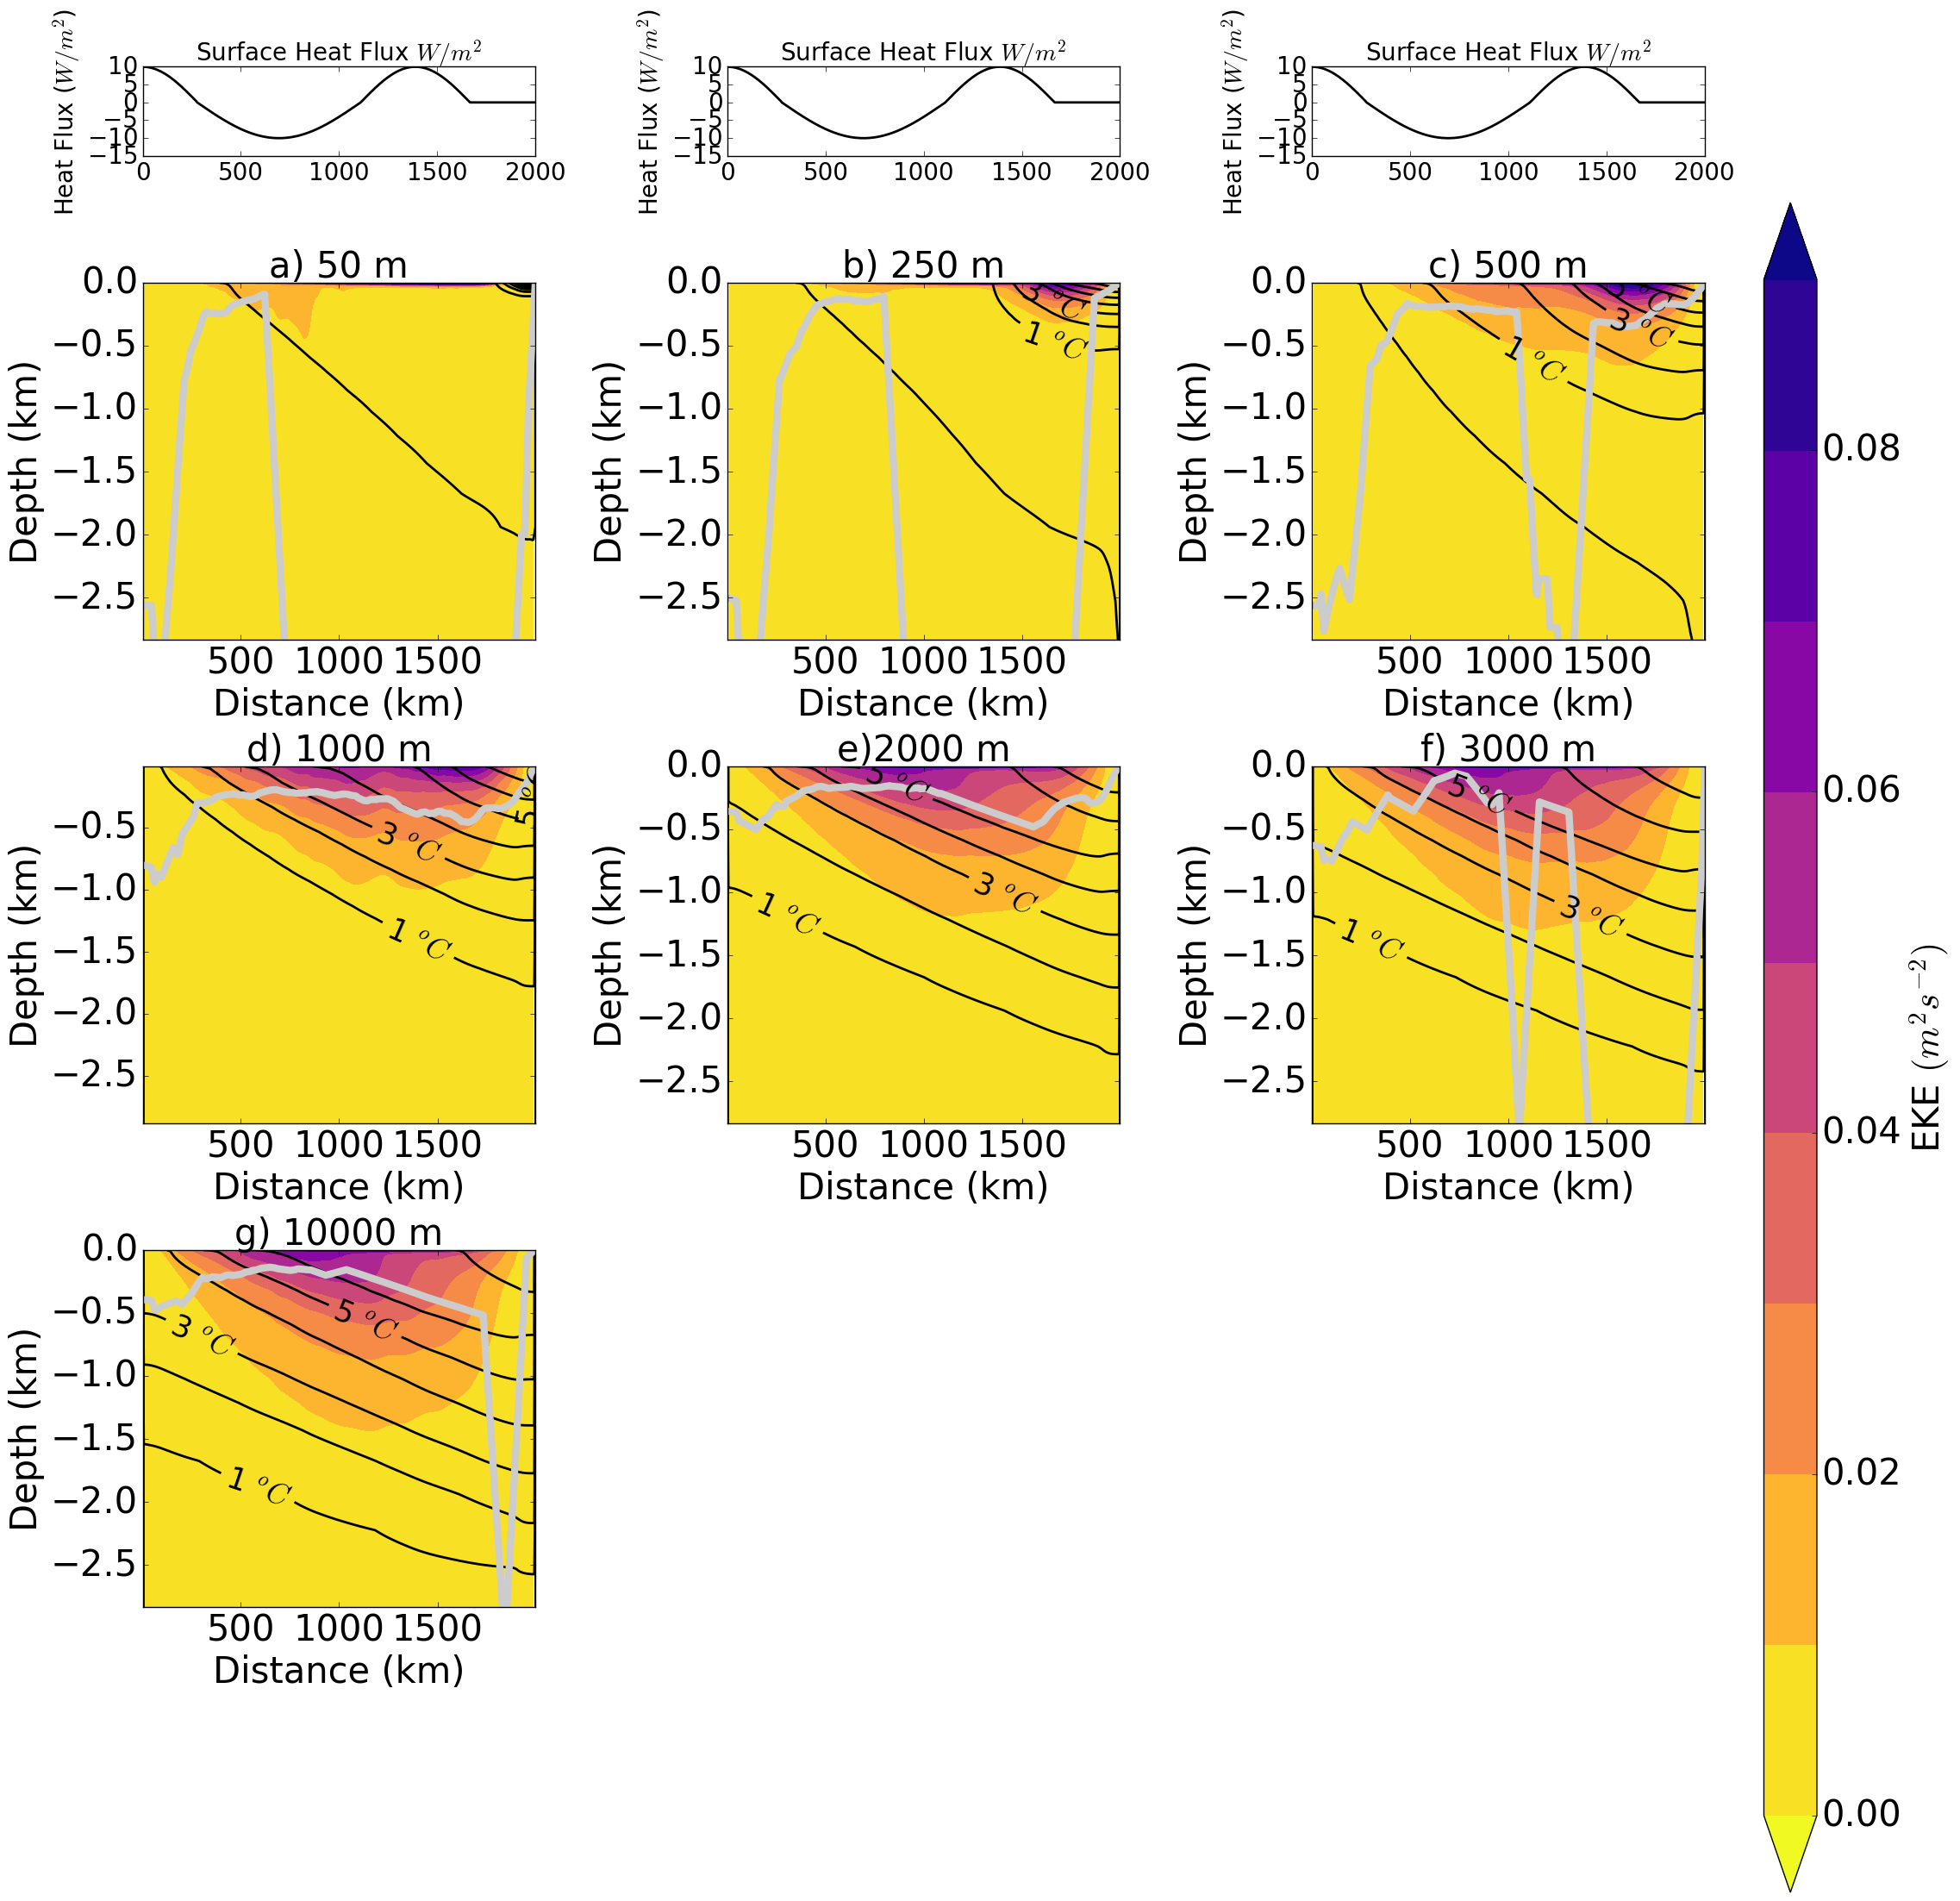

In [39]:
fig = plt.figure(figsize=(20.5, 24.5))
# Create Panels
EKEt = []
EKEt2 = []
Psi_levs = np.arange(-0., .10, .010)
Psi_ticks = np.arange(-0., .10, .02)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
Q = c.mnc('SURF.nc', 'oceQnet').mean(axis=0).mean(axis=1)
gs = gridspec.GridSpec(5, 3, height_ratios=[1, 4, 4, 4, 4])
ax = plt.subplot(gs[0])
ax.plot(c.yc/1000, -Q, color='k', linewidth=2)
ax.set_title('Surface Heat Flux $W/m^2$', fontsize=20)
ax.set_ylabel('Heat Flux ($W/m^2$)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax = plt.subplot(gs[1])
ax.plot(c.yc/1000, -Q, color='k', linewidth=2)
ax.set_title('Surface Heat Flux $W/m^2$', fontsize=20)
ax.set_ylabel('Heat Flux ($W/m^2$)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax = plt.subplot(gs[2])
ax.plot(c.yc/1000, -Q, color='k', linewidth=2)
ax.set_title('Surface Heat Flux $W/m^2$', fontsize=20)
ax.set_ylabel('Heat Flux ($W/m^2$)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
for i in range(len(Runs)):
    #i=1
    fname = x+'/'+str(tau[Runs[i]])+'m/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    EKE = c.calc_EKE()
    CellVol = 5000*5000*1000*np.tile(c.dzf,(c.Nx,c.Ny,1)).T/c.Nx
    EKE1 = c.calc_EKE_all()*CellVol
    EKE1 = np.sum(EKE1,axis=2)
    EKEt.append(np.sum(EKE1))
    EKEt2.append(np.sum(c.calc_EKE_all()))
    ax = plt.subplot(gs[3+i])
    Q2_levs = (np.arange(-1, 8, 1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
                    EKE, Psi_levs, cmap=plt.cm.plasma_r, extend='both')
    Tavlat = c.get_zonal_avg('Tav.nc', 'THETA')
    q = ax.contour(c.yc/1000, c.zc/1000, Tavlat, Q2_levs,
                   colors='k', linewidths=2)
    PI = c.mnc('PSI.nc', "LaPs1TH").mean(axis=2)
    PI = ma.masked_array(PI, PI < 0.95)
    # Depths
    th = c.mnc('PSI.nc', "LaHs1TH").mean(axis=2)
    depths = np.cumsum(th[::-1], axis=0)[::-1]
    DDL = np.zeros(len(c.yc))
    psi = c.get_psi_iso()
    for jj in range(len(c.yc)):
        if (ma.all(PI[:, jj] == 1) or np.all(psi[:, jj] == -0) or PI[:, jj].mask.all()):
            continue
        indx = ma.nonzero(PI[:, jj] < 1)[0]
        b = indx
        if len(b) >= 2 and (b[1]-b[0]) > 1:
            a = b[1]
        else:
            a = b[0]
        if a < 41 and depths[a-1, jj] - depths[a, jj] > 150:
            a = a - 1
        DDL[jj] = depths[a, jj]
    r = ax.plot(c.yc/1000, SG.savitzky_golay(-DDL/1000, 21, 1), scalex=False,
                scaley=False, color='0.8', linestyle='-', linewidth=6)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+' m', fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Psi_ticks)
cbar.ax.set_ylabel('EKE $(m^2s^{-2})$', fontsize=30, )
cbar.ax.tick_params(labelsize=30)
EKET = np.array(EKEt)
EKET2 = np.array(EKEt2)

In [15]:
tau = ['50', '500', '2000', '10000']

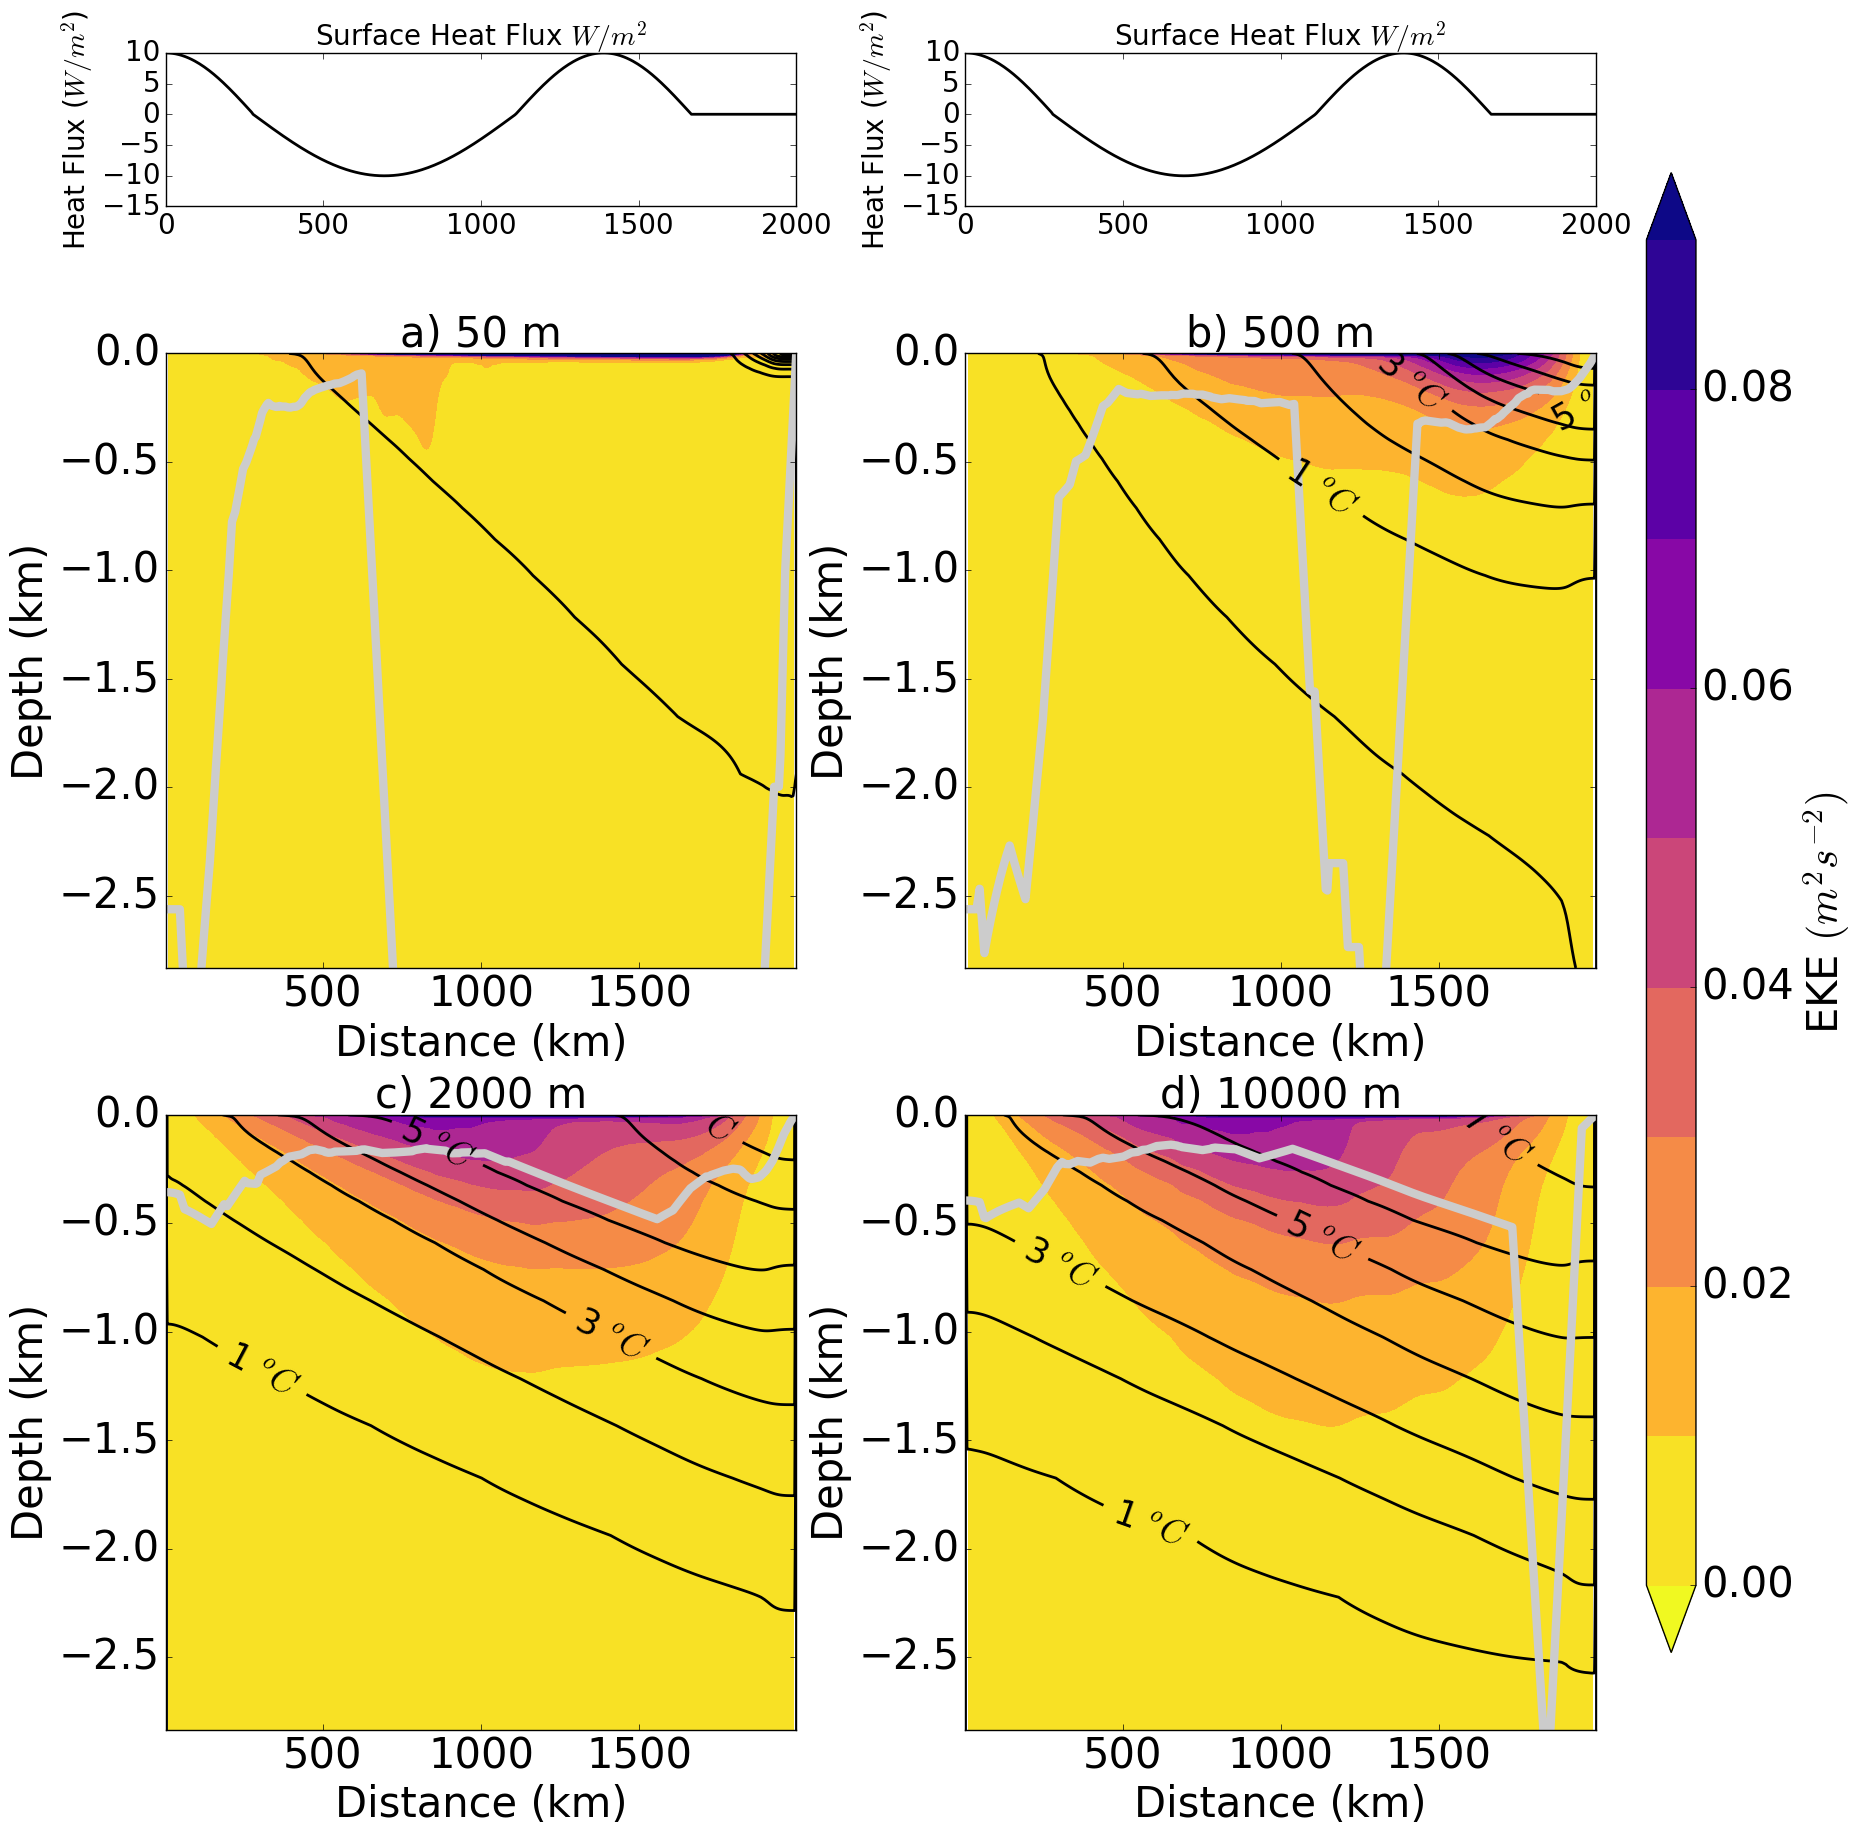

In [17]:
 fig = plt.figure(figsize=(16.5, 18.5))
# Create Panels
Psi_levs = np.arange(-0., .10, .010)
Psi_ticks = np.arange(-0., .10, .02)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
Q = c.mnc('SURF.nc', 'oceQnet').mean(axis=0).mean(axis=1)
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 4, 4])
ax = plt.subplot(gs[0])
ax.plot(c.yc/1000, -Q, color='k', linewidth=2)
ax.set_title('Surface Heat Flux $W/m^2$', fontsize=20)
ax.set_ylabel('Heat Flux ($W/m^2$)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax = plt.subplot(gs[1])
ax.plot(c.yc/1000, -Q, color='k', linewidth=2)
ax.set_title('Surface Heat Flux $W/m^2$', fontsize=20)
ax.set_ylabel('Heat Flux ($W/m^2$)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
for i in range(len(tau)):
    #i=1
    fname = x+'/'+str(tau[i])+'m/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    EKE = c.calc_EKE()
    ax = plt.subplot(gs[2+i])
    Q2_levs = (np.arange(-1, 8, 1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
                    EKE, Psi_levs, cmap=plt.cm.plasma_r, extend='both')
    Tavlat = c.get_zonal_avg('Tav.nc', 'THETA')
    q = ax.contour(c.yc/1000, c.zc/1000, Tavlat, Q2_levs,
                   colors='k', linewidths=2)
    PI = c.mnc('PSI.nc', "LaPs1TH").mean(axis=2)
    PI = ma.masked_array(PI, PI < 0.95)
    # Depths
    th = c.mnc('PSI.nc', "LaHs1TH").mean(axis=2)
    depths = np.cumsum(th[::-1], axis=0)[::-1]
    DDL = np.zeros(len(c.yc))
    psi = c.get_psi_iso()
    for jj in range(len(c.yc)):
        if (ma.all(PI[:, jj] == 1) or np.all(psi[:, jj] == -0) or PI[:, jj].mask.all()):
            continue
        indx = ma.nonzero(PI[:, jj] < 1)[0]
        b = indx
        if len(b) >= 2 and (b[1]-b[0]) > 1:
            a = b[1]
        else:
            a = b[0]
        if a < 41 and depths[a-1, jj] - depths[a, jj] > 150:
            a = a - 1
        DDL[jj] = depths[a, jj]
    r = ax.plot(c.yc/1000, SG.savitzky_golay(-DDL/1000, 21, 1), scalex=False,
                scaley=False, color='0.8', linestyle='-', linewidth=6)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+' m', fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Psi_ticks)
cbar.ax.set_ylabel('EKE $(m^2s^{-2})$', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

(50.0, 20000)

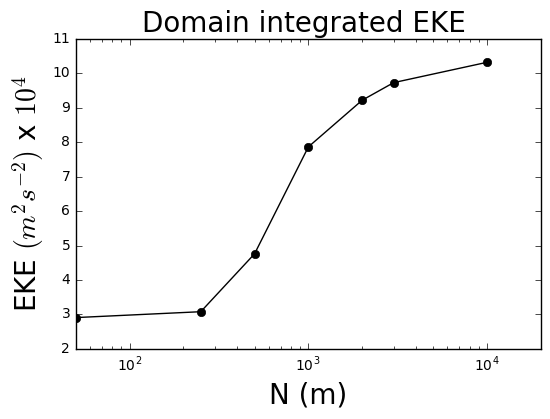

In [49]:
plt.plot([50,250,500,1000,2000,3000,10000],(EKET/(200*5000*3000))*10**-4,'-ko')
plt.xscale("log")
plt.xlabel('N (m)', fontsize=20)
plt.ylabel(r'EKE $(m^2 s^{-2})$ x $10^{4}$', fontsize=20)
plt.title('Domain integrated EKE ', fontsize=20)
#plt.ylim(0,.65)
plt.xlim(0,2*10**4)